In [1]:
import sys
import matplotlib
%matplotlib inline
import argparse
from nbfinder import NotebookFinder
sys.meta_path.append(NotebookFinder())
from notebooks.data_loader import *
from notebooks.helper_fxns import *
from notebooks.print_n_plot import *
import notebooks.binary_classif_convnet as bcc
import notebooks.conv_ae_anom as caen
from notebooks.train_val import *
import warnings
import lasagne
import theano
from theano import tensor as T
import sys
import numpy as np
import logging
import time
import pickle
import argparse
from os.path import join

importing Jupyter notebook from notebooks/data_loader.ipynb


/global/common/cori/software/python/2.7-anaconda/envs/deeplearning/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


importing Jupyter notebook from notebooks/helper_fxns.ipynb
importing Jupyter notebook from notebooks/print_n_plot.ipynb
importing Jupyter notebook from notebooks/binary_classif_convnet.ipynb
importing Jupyter notebook from notebooks/conv_ae_anom.ipynb
importing Jupyter notebook from notebooks/train_val.ipynb
importing Jupyter notebook from notebooks/objectives.ipynb


In [2]:
def setup_kwargs():
    
    default_args = {'input_shape': tuple([None] + [1, 64, 64]), 
                      'learning_rate': 0.001, 
                      'dropout_p': 0, 
                      'weight_decay': 0,
                      'num_filters': 10, 
                      'num_fc_units': 32,
                      'num_layers': 3,
                      'momentum': 0.9,
                      'num_epochs': 20000,
                      'batch_size': 128,
                      "save_path": "None",
                      "event_frac": 0.001,
                      "sig_eff_at": 0.9996,
                      "test":False, "seed": 7,
                      "mode":"classif",
                      "ae":False}
    
    
    # if inside a notebook, then get rid of weird notebook arguments, so that arg parsing still works
    if any(["jupyter" in arg for arg in sys.argv]):
        sys.argv=sys.argv[:1]


    parser = argparse.ArgumentParser(formatter_class=argparse.ArgumentDefaultsHelpFormatter)
    #make a command line argument for every flag in default args
    for k,v in default_args.iteritems():
        parser.add_argument('--' + k, type=type(v), default=v, help=k)

    args = parser.parse_args()
    
    if args.save_path == "None":
        save_path = None
    else:
        save_path = args.save_path


    kwargs = default_args
    kwargs.update(args.__dict__)
    run_dir = create_run_dir(save_path)
    kwargs['save_path'] = run_dir
    kwargs["logger"] = get_logger(kwargs['save_path'])

    return kwargs

{'ae': False, 'num_layers': 3, 'dropout_p': 0, 'seed': 7, 'num_epochs': 20000, 'weight_decay': 0, 'num_val': 413, 'sig_eff_at': 0.9996, 'save_path': './results/run397', 'test': False, 'event_frac': 0.001, 'logger': <logging.Logger object at 0x2ae916095890>, 'momentum': 0.9, 'mode': 'classif', 'learning_rate': 0.001, 'input_shape': (None, 1, 64, 64), 'batch_size': 128, 'num_train': 1650, 'num_fc_units': 32, 'num_filters': 10}


/global/cscratch1/sd/racah/atlas_h5/train_jetjet_JZ3.h5
/global/cscratch1/sd/racah/atlas_h5/train_jetjet_JZ4.h5
/global/cscratch1/sd/racah/atlas_h5/train_jetjet_JZ5.h5
/global/cscratch1/sd/racah/atlas_h5/train_jetjet_JZ6.h5
/global/cscratch1/sd/racah/atlas_h5/train_jetjet_JZ7.h5
/global/cscratch1/sd/racah/atlas_h5/train_jetjet_JZ8.h5
/global/cscratch1/sd/racah/atlas_h5/train_jetjet_JZ9.h5
/global/cscratch1/sd/racah/atlas_h5/train_jetjet_JZ10.h5
/global/cscratch1/sd/racah/atlas_h5/train_jetjet_JZ11.h5
/global/cscratch1/sd/racah/atlas_h5/train_GG_RPV10_1400_850.h5
0.117469072342


<lasagne.layers.input.InputLayer object at 0x2ae91608fd50>(None, 1, 64, 64)
<lasagne.layers.conv.Conv2DLayer object at 0x2ae9160b1d50>(None, 10, 64, 64)
<lasagne.layers.normalization.BatchNormLayer object at 0x2ae91611b1d0>(None, 10, 64, 64)
<lasagne.layers.special.NonlinearityLayer object at 0x2ae91611bd10>(None, 10, 64, 64)
<lasagne.layers.pool.MaxPool2DLayer object at 0x2ae91611be50>(None, 10, 32, 32)
<lasagne.layers.conv.Conv2DLayer object at 0x2ae91611be90>(None, 10, 32, 32)
<lasagne.layers.normalization.BatchNormLayer object at 0x2ae91611bfd0>(None, 10, 32, 32)
<lasagne.layers.special.NonlinearityLayer object at 0x2ae91612e490>(None, 10, 32, 32)
<lasagne.layers.pool.MaxPool2DLayer object at 0x2ae91612e5d0>(None, 10, 16, 16)
<lasagne.layers.conv.Conv2DLayer object at 0x2ae91612e610>(None, 10, 16, 16)
<lasagne.layers.normalization.BatchNormLayer object at 0x2ae91612e810>(None, 10, 16, 16)
<lasagne.layers.special.NonlinearityLayer object at 0x2ae91612ebd0>(None, 10, 16, 16)
<lasagne

22588




<lasagne.layers.input.InputLayer object at 0x2ae91608fd50> : (None, 1, 64, 64)
<lasagne.layers.conv.Conv2DLayer object at 0x2ae9160b1d50> : (None, 10, 64, 64)
<lasagne.layers.normalization.BatchNormLayer object at 0x2ae91611b1d0> : (None, 10, 64, 64)
<lasagne.layers.special.NonlinearityLayer object at 0x2ae91611bd10> : (None, 10, 64, 64)
<lasagne.layers.pool.MaxPool2DLayer object at 0x2ae91611be50> : (None, 10, 32, 32)
<lasagne.layers.conv.Conv2DLayer object at 0x2ae91611be90> : (None, 10, 32, 32)
<lasagne.layers.normalization.BatchNormLayer object at 0x2ae91611bfd0> : (None, 10, 32, 32)
<lasagne.layers.special.NonlinearityLayer object at 0x2ae91612e490> : (None, 10, 32, 32)
<lasagne.layers.pool.MaxPool2DLayer object at 0x2ae91612e5d0> : (None, 10, 16, 16)
<lasagne.layers.conv.Conv2DLayer object at 0x2ae91612e610> : (None, 10, 16, 16)
<lasagne.layers.normalization.BatchNormLayer object at 0x2ae91612e810> : (None, 10, 16, 16)
<lasagne.layers.special.NonlinearityLayer object at 0x2ae91

beginning epoch 0


/global/common/cori/software/python/2.7-anaconda/envs/deeplearning/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


beginning epoch 0


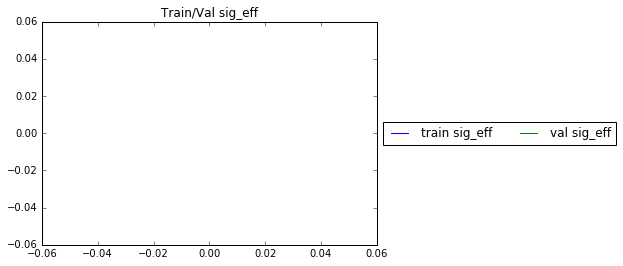

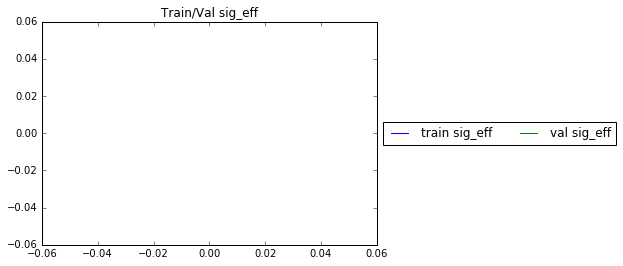

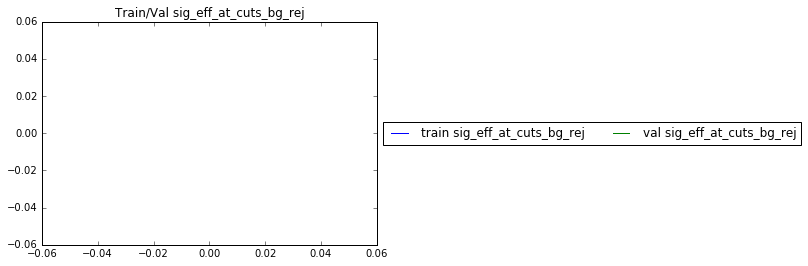

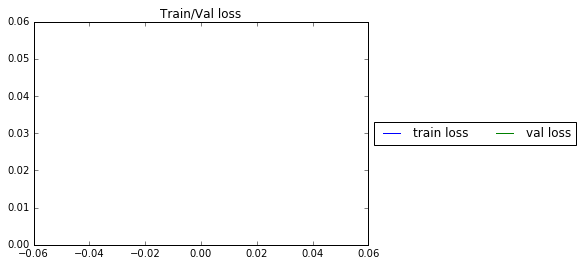

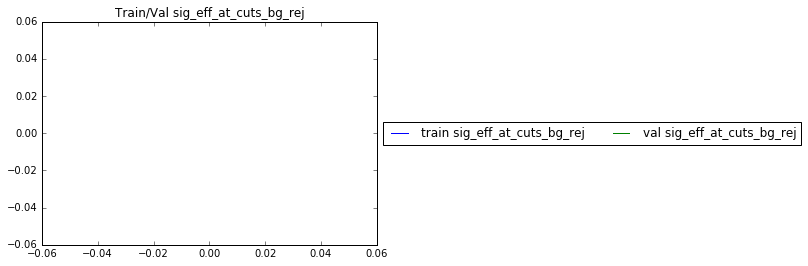

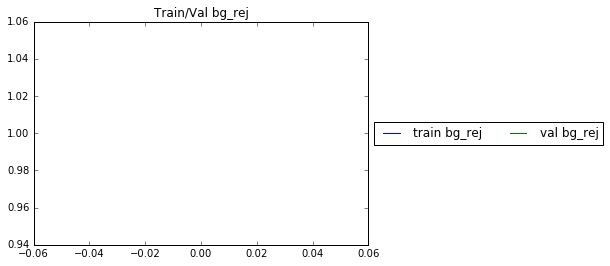

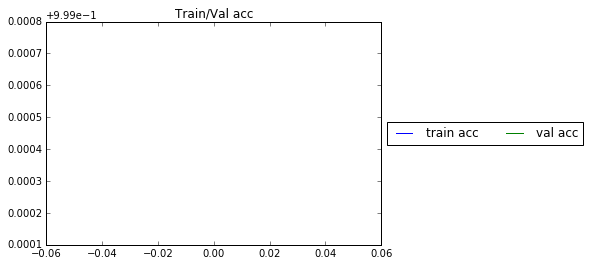

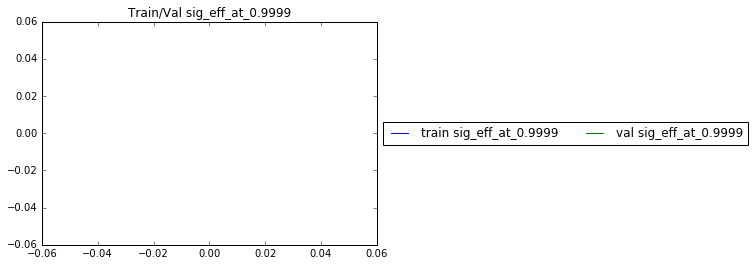

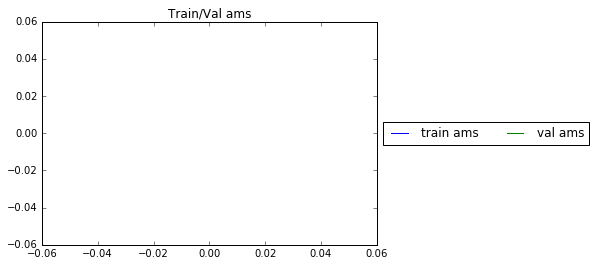

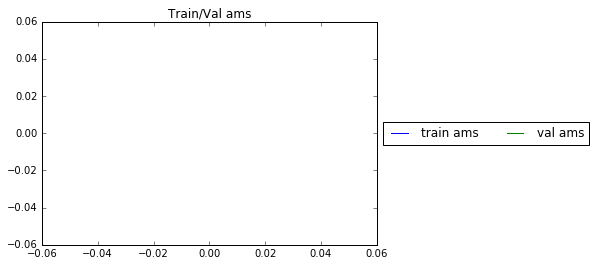

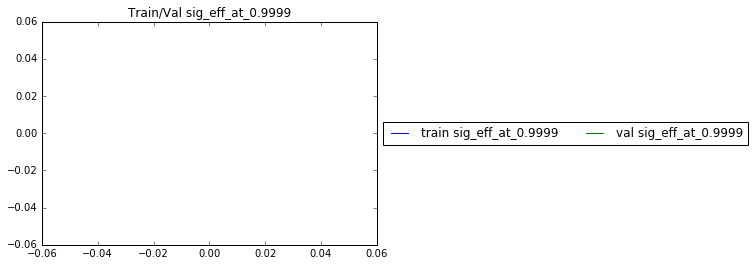

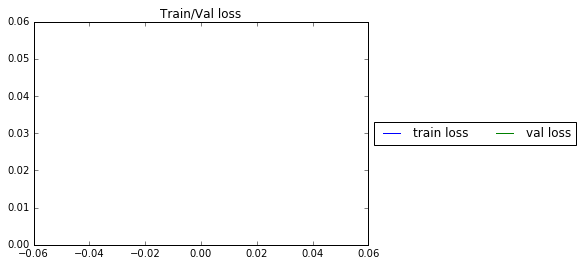

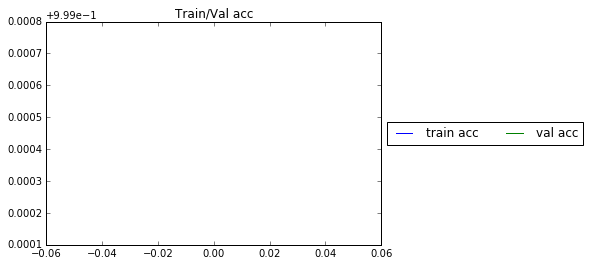

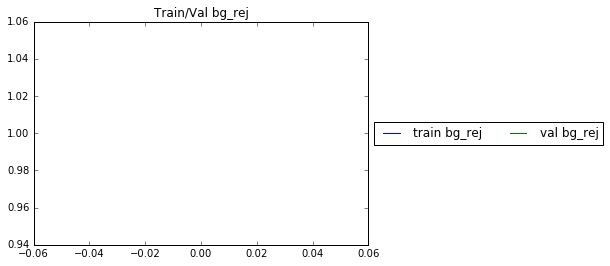

Epoch 1 of 20000 took 7.979s
		tr_sig_eff:		0.0000 %
		tr_phys_cuts_sig_eff:		20.0000 %
		tr_sig_eff_at_cuts_bg_rej:		0.0000 %
		tr_phys_cuts_ams:		7.4727
		tr_phys_cuts_bg_rej:		99.9989 %
		tr_bg_rej:		100.0000 %
		tr_acc:		99.9135 %
		tr_ams:		0.0000
		tr_sig_eff_at_0.9999:		0.0000 %
		tr_loss:		0.0583
	Validation took 0.633s
		val_sig_eff:		0.0000 %
		val_phys_cuts_ams:		0.0000
		val_loss:		0.0011
		val_phys_cuts_bg_rej:		99.9992 %
		val_sig_eff_at_cuts_bg_rej:		0.0000 %
		val_sig_eff_at_0.9999:		0.0000 %
		val_ams:		0.0000
		val_phys_cuts_sig_eff:		0.0000 %
		val_acc:		99.9744 %
		val_bg_rej:		100.0000 %


beginning epoch 1
beginning epoch 1


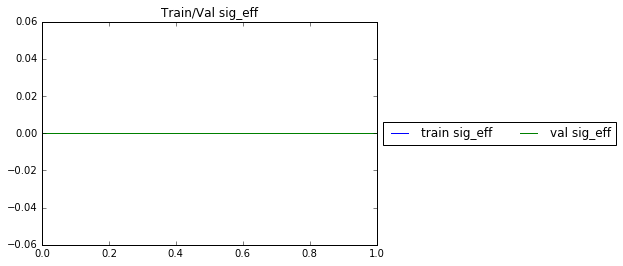

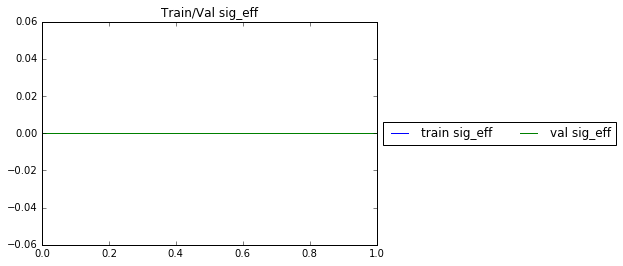

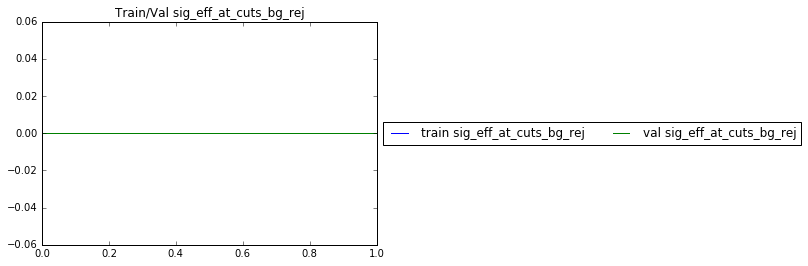

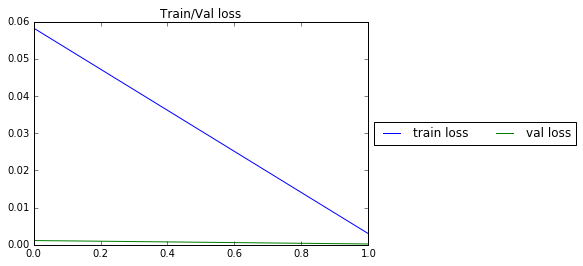

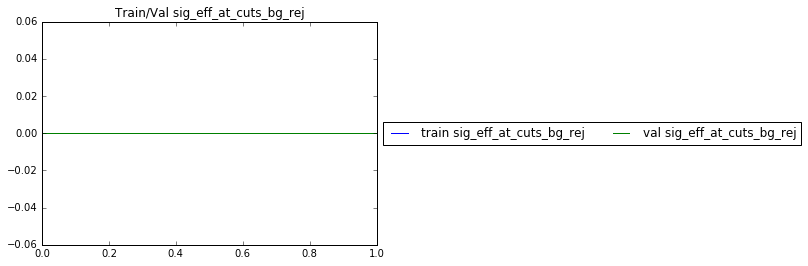

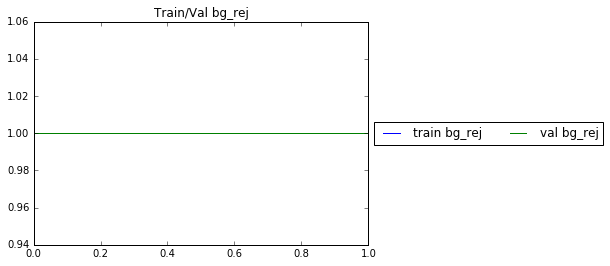

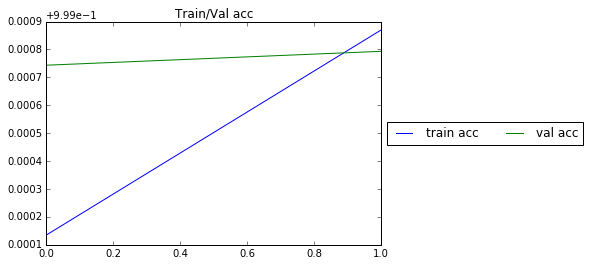

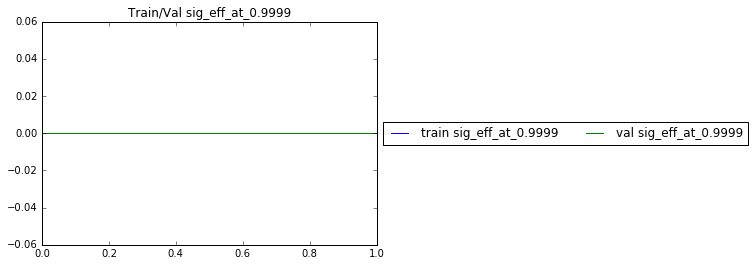

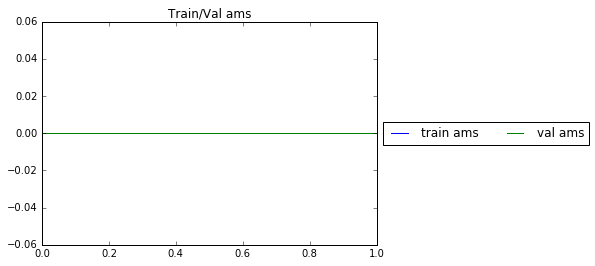

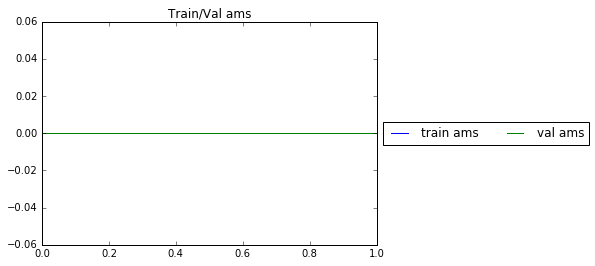

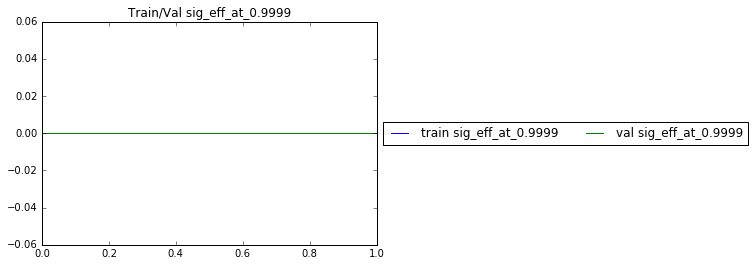

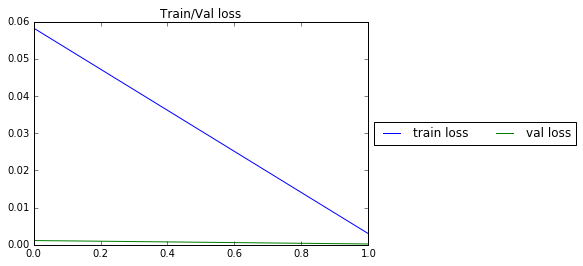

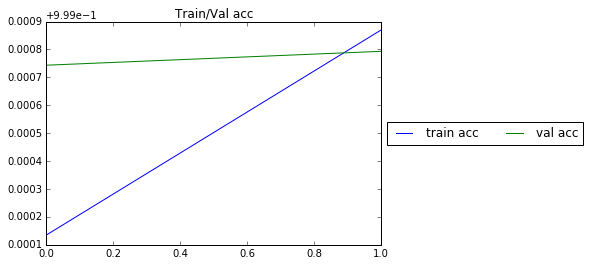

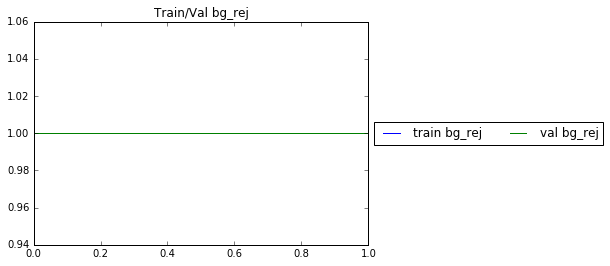

Epoch 2 of 20000 took 8.180s
		tr_sig_eff:		0.0000 %
		tr_phys_cuts_sig_eff:		20.0000 %
		tr_sig_eff_at_cuts_bg_rej:		0.0000 %
		tr_phys_cuts_ams:		7.4727
		tr_phys_cuts_bg_rej:		99.9989 %
		tr_bg_rej:		100.0000 %
		tr_acc:		99.9870 %
		tr_ams:		0.0000
		tr_sig_eff_at_0.9999:		0.0000 %
		tr_loss:		0.0030
	Validation took 0.817s
		val_sig_eff:		0.0000 %
		val_phys_cuts_ams:		0.0000
		val_loss:		0.0002
		val_phys_cuts_bg_rej:		99.9992 %
		val_sig_eff_at_cuts_bg_rej:		0.0000 %
		val_sig_eff_at_0.9999:		0.0000 %
		val_ams:		0.0000
		val_phys_cuts_sig_eff:		0.0000 %
		val_acc:		99.9793 %
		val_bg_rej:		100.0000 %


beginning epoch 2
beginning epoch 2


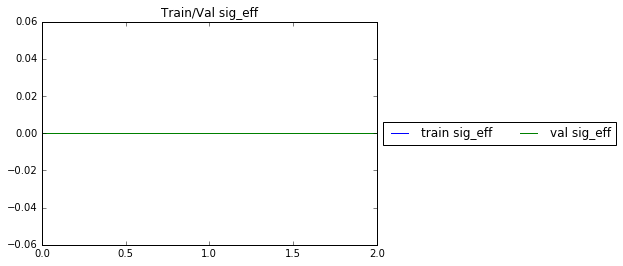

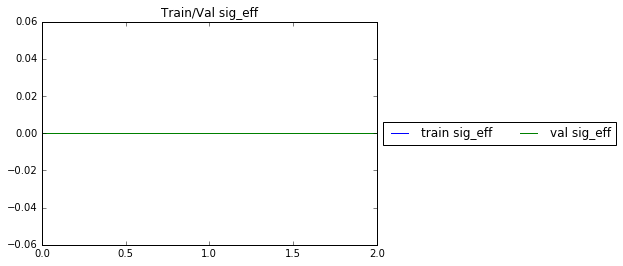

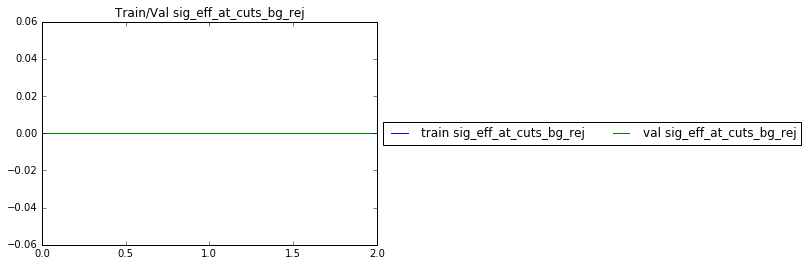

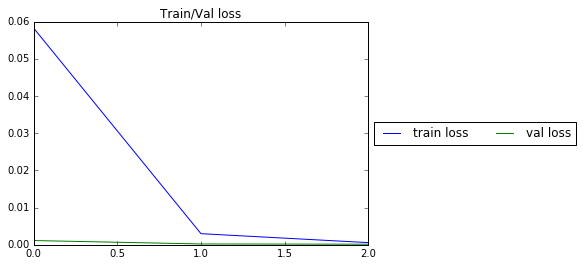

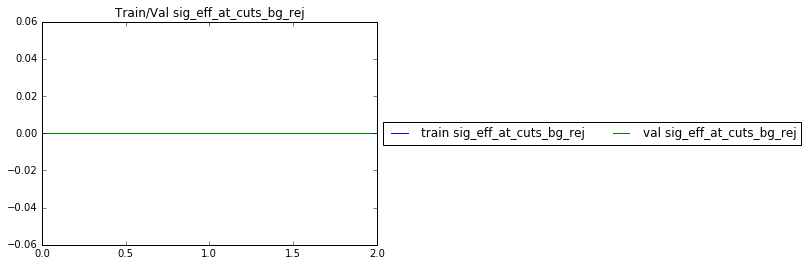

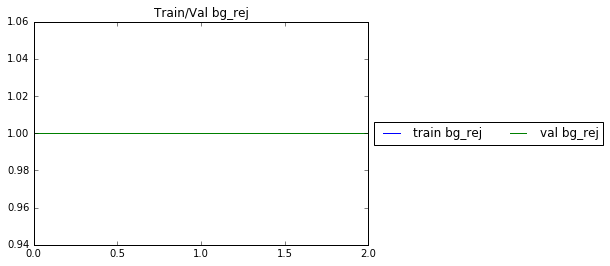

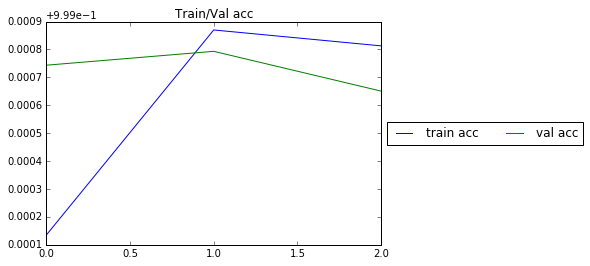

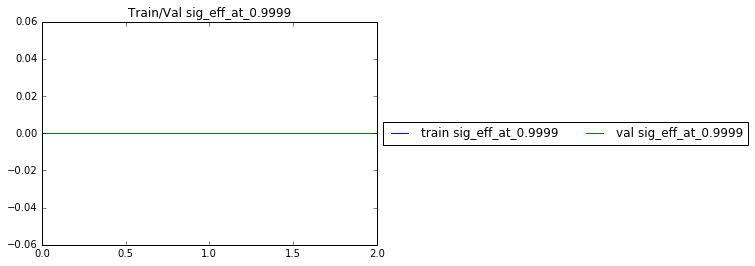

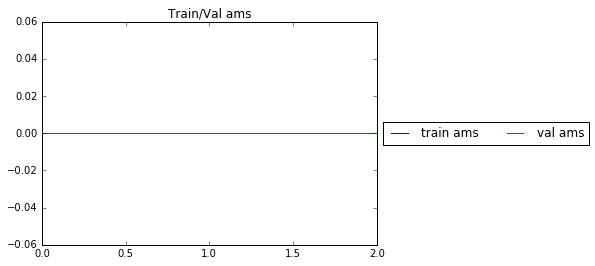

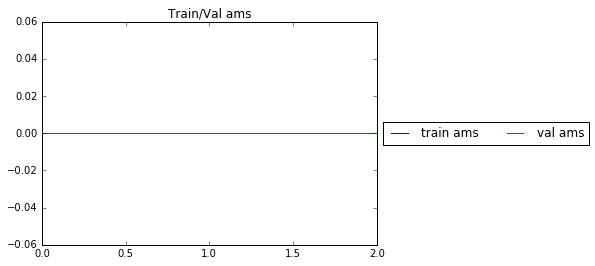

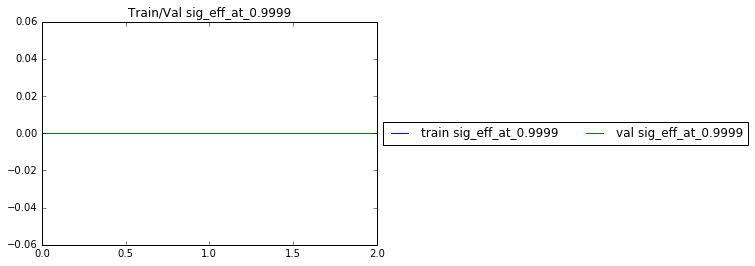

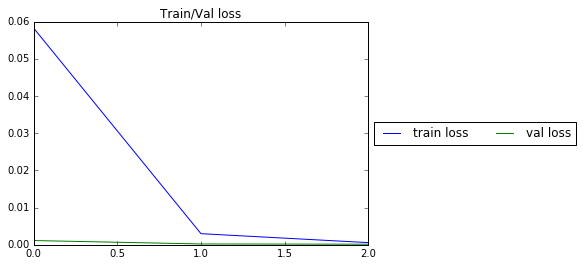

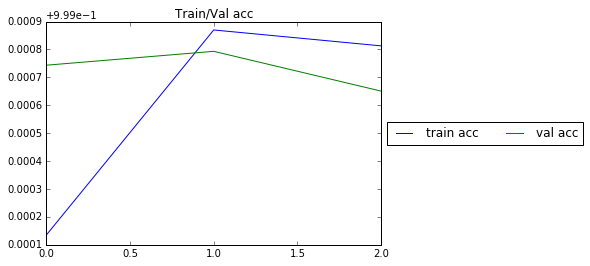

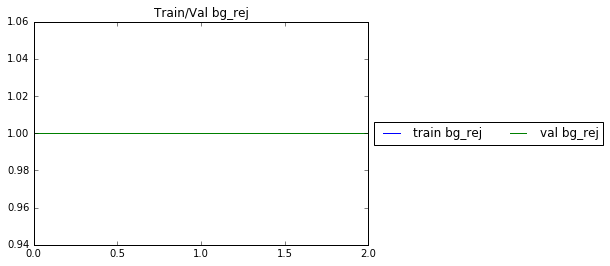

Epoch 3 of 20000 took 8.009s
		tr_sig_eff:		0.0000 %
		tr_phys_cuts_sig_eff:		20.0000 %
		tr_sig_eff_at_cuts_bg_rej:		0.0000 %
		tr_phys_cuts_ams:		7.4727
		tr_phys_cuts_bg_rej:		99.9989 %
		tr_bg_rej:		100.0000 %
		tr_acc:		99.9813 %
		tr_ams:		0.0000
		tr_sig_eff_at_0.9999:		0.0000 %
		tr_loss:		0.0006
	Validation took 0.859s
		val_sig_eff:		0.0000 %
		val_phys_cuts_ams:		0.0000
		val_loss:		0.0002
		val_phys_cuts_bg_rej:		99.9992 %
		val_sig_eff_at_cuts_bg_rej:		0.0000 %
		val_sig_eff_at_0.9999:		0.0000 %
		val_ams:		0.0000
		val_phys_cuts_sig_eff:		0.0000 %
		val_acc:		99.9651 %
		val_bg_rej:		100.0000 %


beginning epoch 3
beginning epoch 3


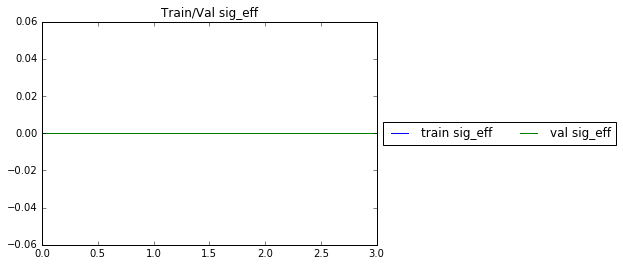

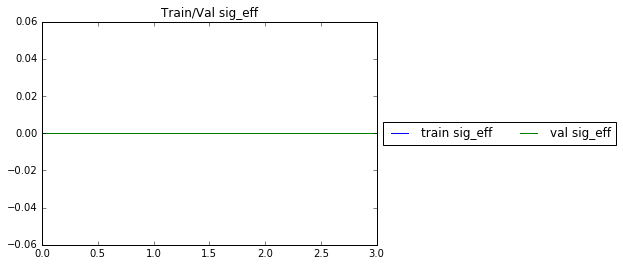

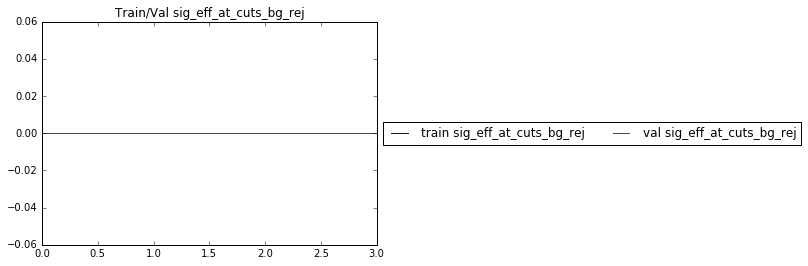

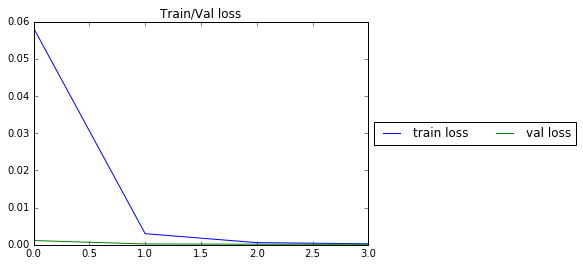

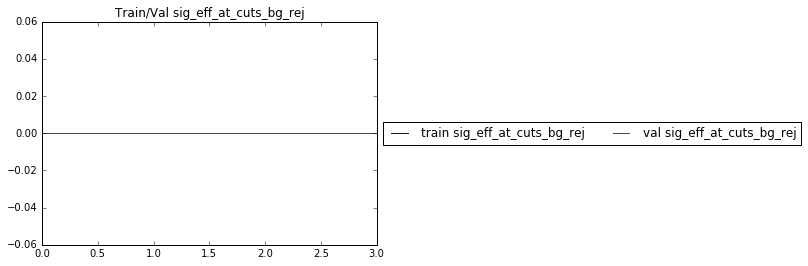

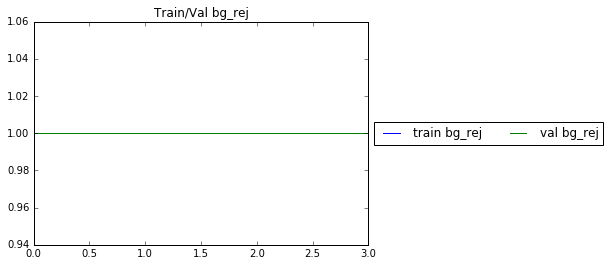

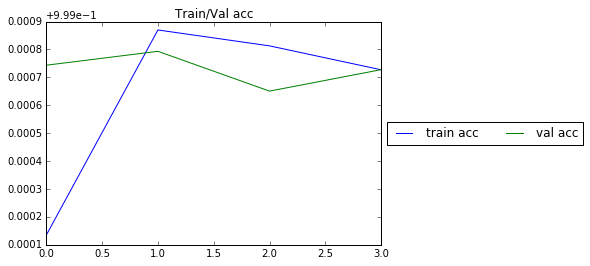

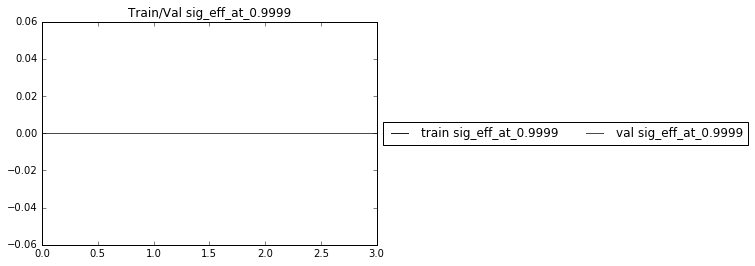

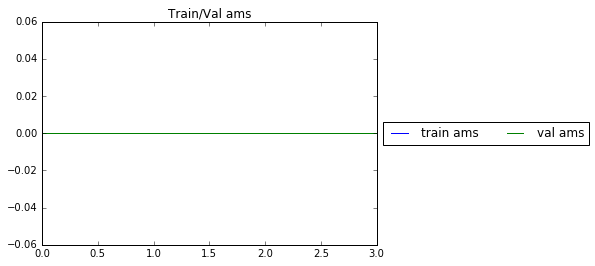

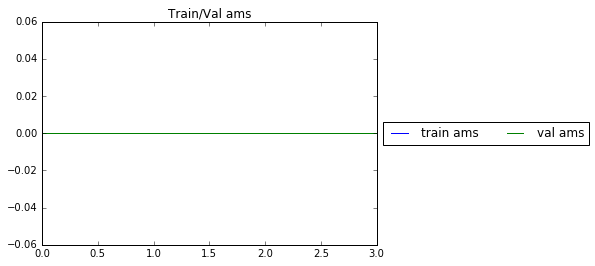

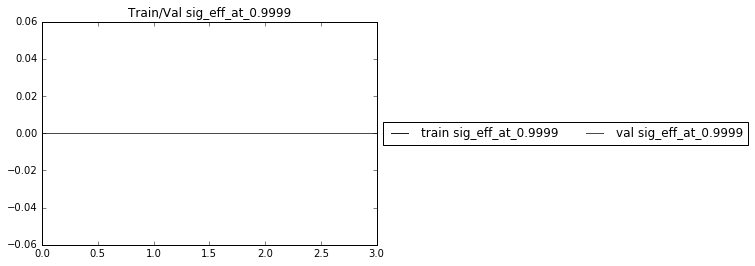

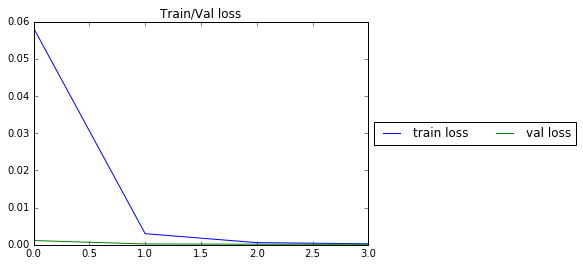

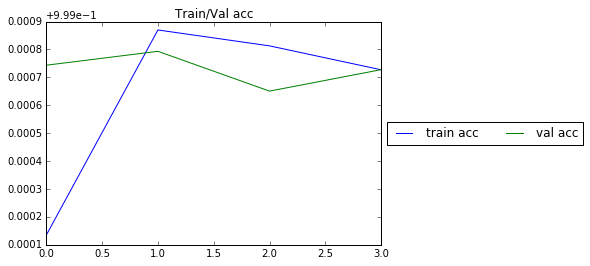

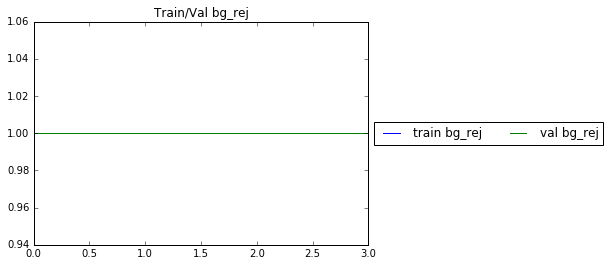

Epoch 4 of 20000 took 8.208s
		tr_sig_eff:		0.0000 %
		tr_phys_cuts_sig_eff:		20.0000 %
		tr_sig_eff_at_cuts_bg_rej:		0.0000 %
		tr_phys_cuts_ams:		7.4727
		tr_phys_cuts_bg_rej:		99.9989 %
		tr_bg_rej:		100.0000 %
		tr_acc:		99.9727 %
		tr_ams:		0.0000
		tr_sig_eff_at_0.9999:		0.0000 %
		tr_loss:		0.0003
	Validation took 0.700s
		val_sig_eff:		0.0000 %
		val_phys_cuts_ams:		0.0000
		val_loss:		0.0001
		val_phys_cuts_bg_rej:		99.9992 %
		val_sig_eff_at_cuts_bg_rej:		0.0000 %
		val_sig_eff_at_0.9999:		0.0000 %
		val_ams:		0.0000
		val_phys_cuts_sig_eff:		0.0000 %
		val_acc:		99.9728 %
		val_bg_rej:		100.0000 %


beginning epoch 4
beginning epoch 4


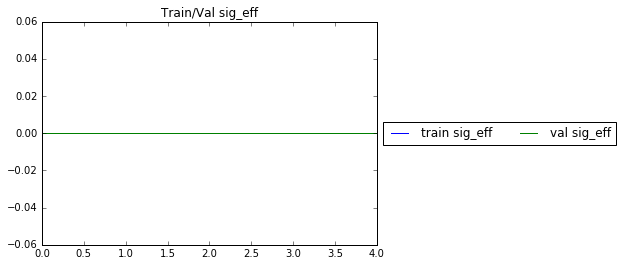

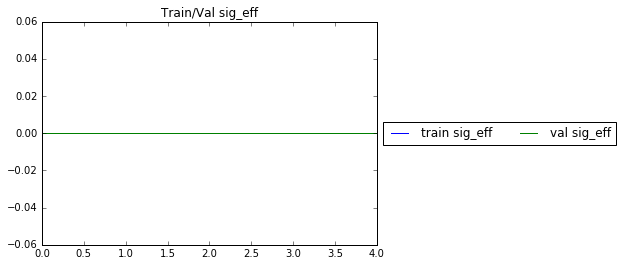

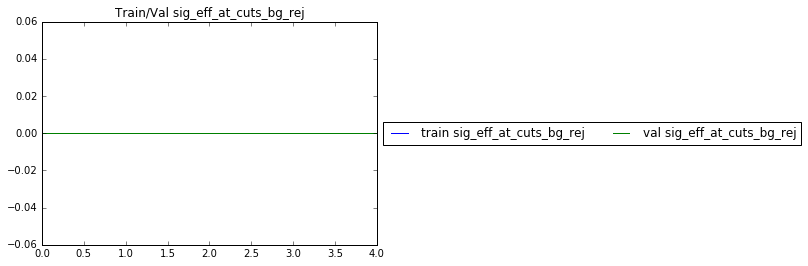

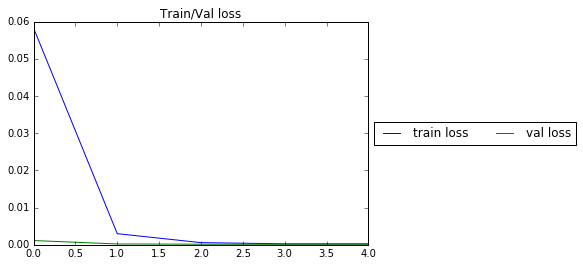

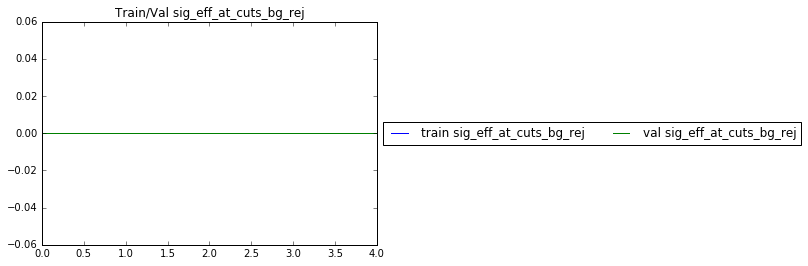

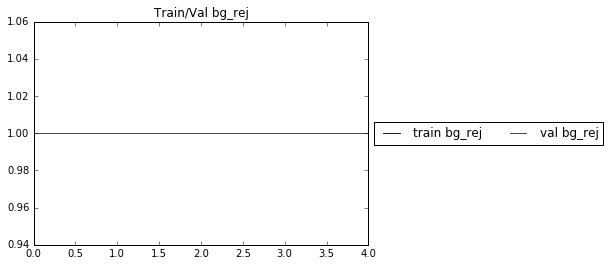

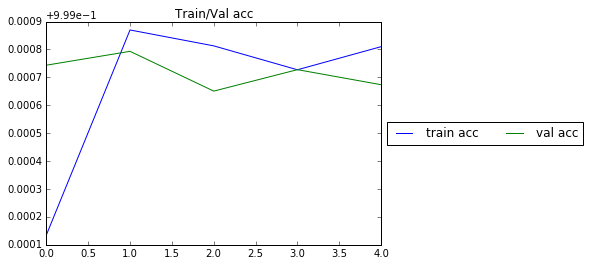

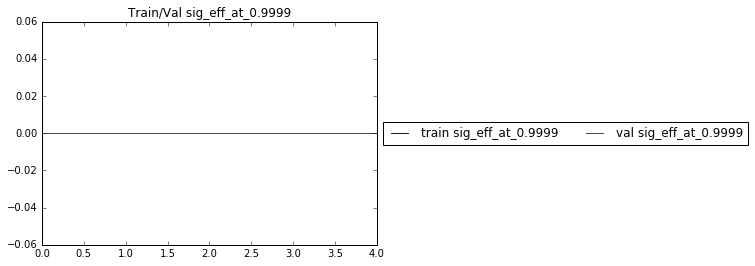

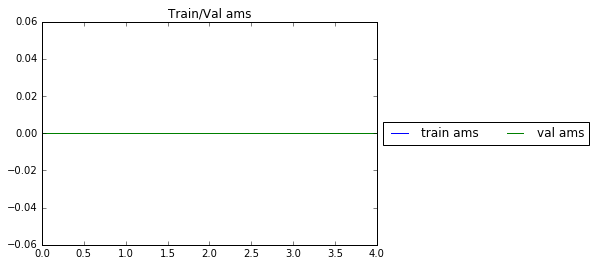

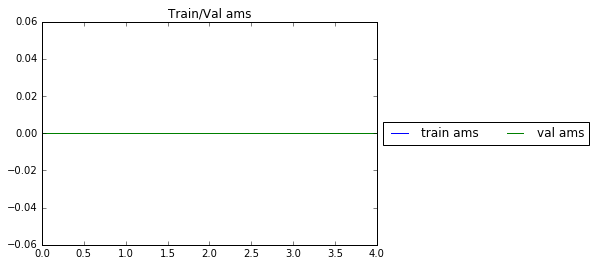

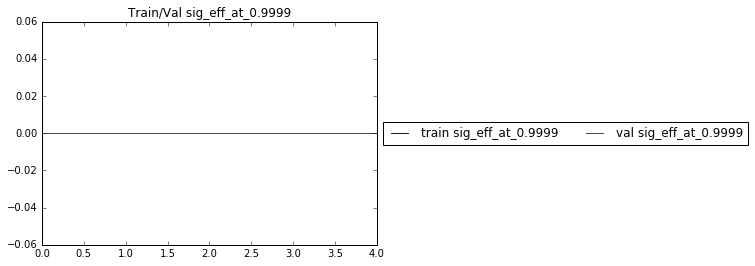

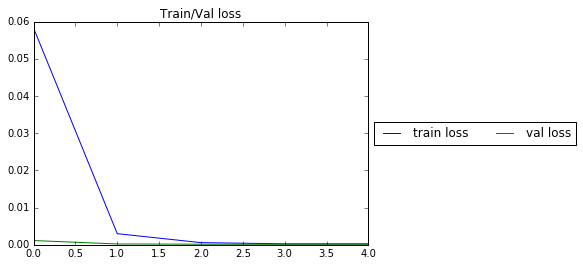

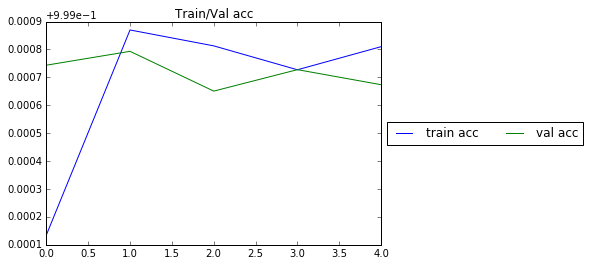

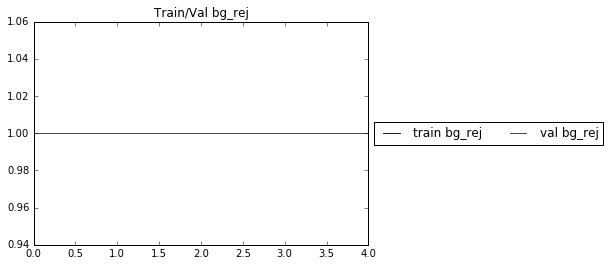

Epoch 5 of 20000 took 8.540s
		tr_sig_eff:		0.0000 %
		tr_phys_cuts_sig_eff:		20.0000 %
		tr_sig_eff_at_cuts_bg_rej:		0.0000 %
		tr_phys_cuts_ams:		7.4727
		tr_phys_cuts_bg_rej:		99.9989 %
		tr_bg_rej:		100.0000 %
		tr_acc:		99.9810 %
		tr_ams:		0.0000
		tr_sig_eff_at_0.9999:		0.0000 %
		tr_loss:		0.0003
	Validation took 0.724s
		val_sig_eff:		0.0000 %
		val_phys_cuts_ams:		0.0000
		val_loss:		0.0001
		val_phys_cuts_bg_rej:		99.9992 %
		val_sig_eff_at_cuts_bg_rej:		0.0000 %
		val_sig_eff_at_0.9999:		0.0000 %
		val_ams:		0.0000
		val_phys_cuts_sig_eff:		0.0000 %
		val_acc:		99.9674 %
		val_bg_rej:		100.0000 %


beginning epoch 5
beginning epoch 5


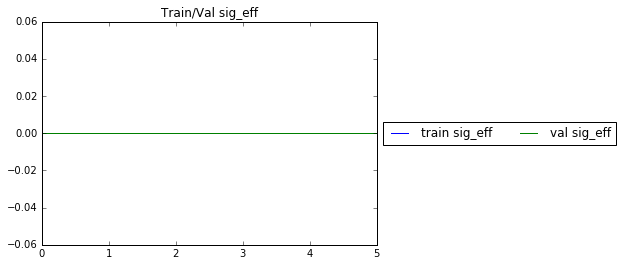

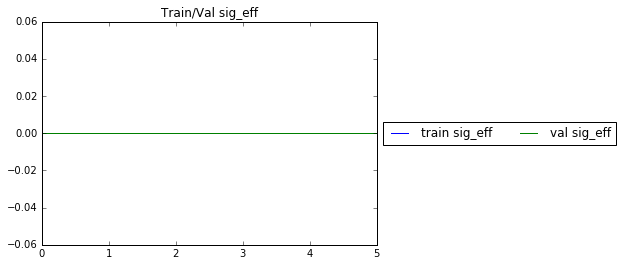

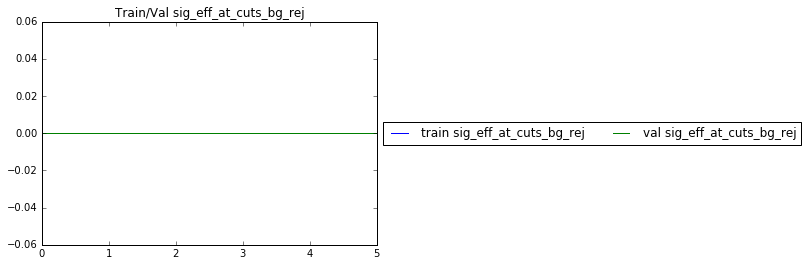

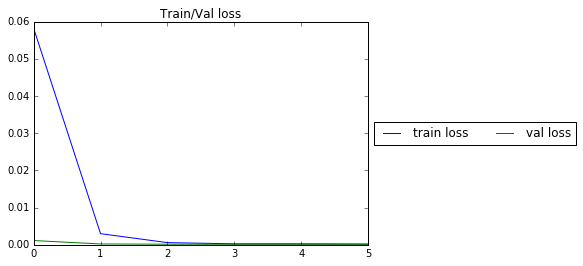

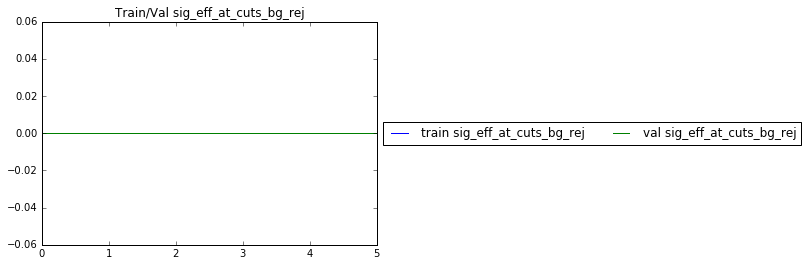

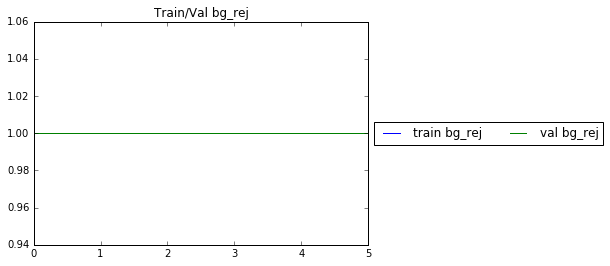

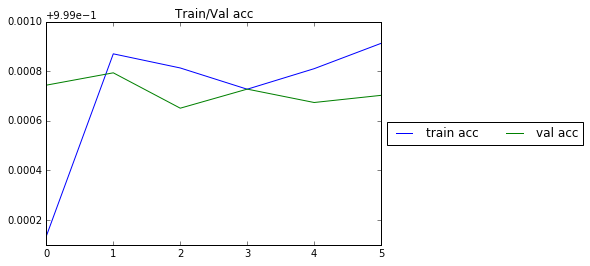

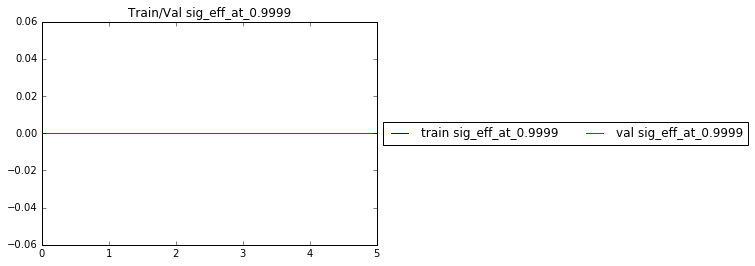

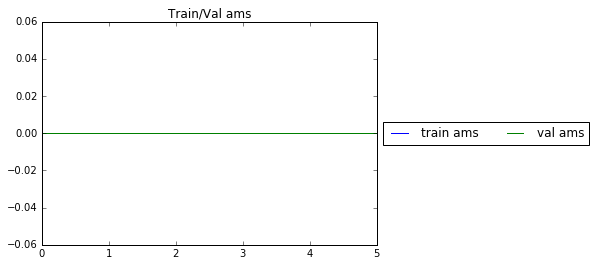

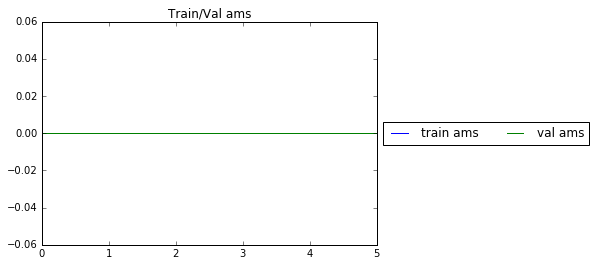

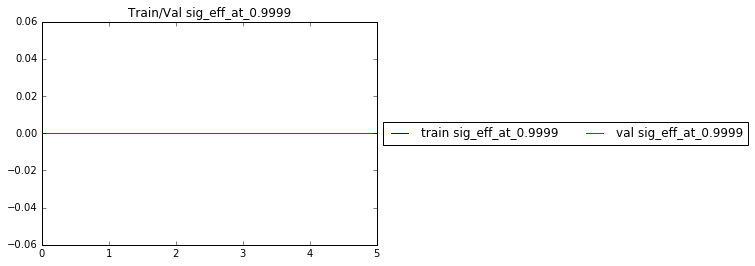

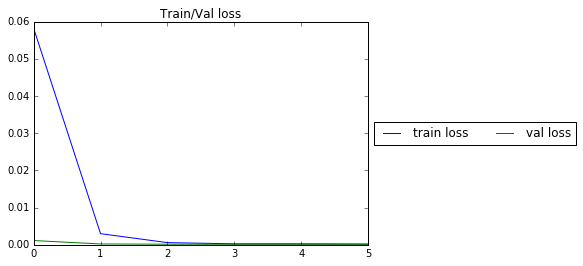

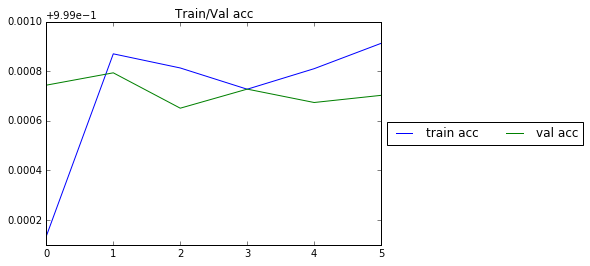

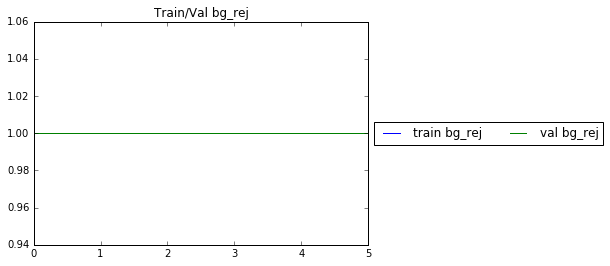

Epoch 6 of 20000 took 8.291s
		tr_sig_eff:		0.0000 %
		tr_phys_cuts_sig_eff:		20.0000 %
		tr_sig_eff_at_cuts_bg_rej:		0.0000 %
		tr_phys_cuts_ams:		7.4727
		tr_phys_cuts_bg_rej:		99.9989 %
		tr_bg_rej:		100.0000 %
		tr_acc:		99.9912 %
		tr_ams:		0.0000
		tr_sig_eff_at_0.9999:		0.0000 %
		tr_loss:		0.0002
	Validation took 0.711s
		val_sig_eff:		0.0000 %
		val_phys_cuts_ams:		0.0000
		val_loss:		0.0001
		val_phys_cuts_bg_rej:		99.9992 %
		val_sig_eff_at_cuts_bg_rej:		0.0000 %
		val_sig_eff_at_0.9999:		0.0000 %
		val_ams:		0.0000
		val_phys_cuts_sig_eff:		0.0000 %
		val_acc:		99.9703 %
		val_bg_rej:		100.0000 %


beginning epoch 6
beginning epoch 6


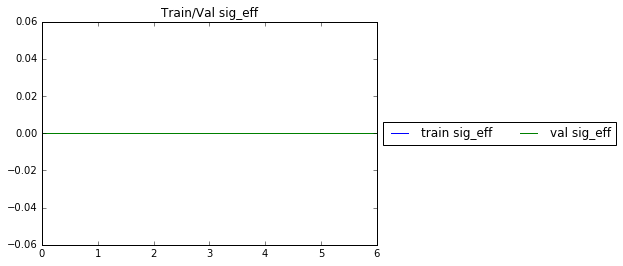

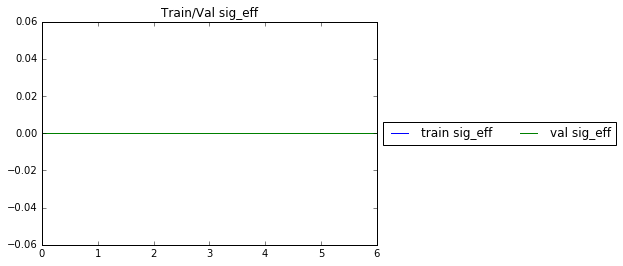

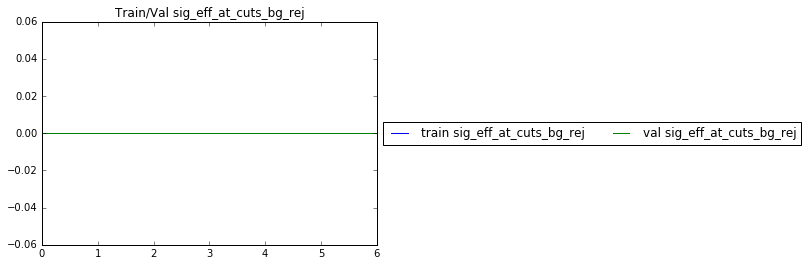

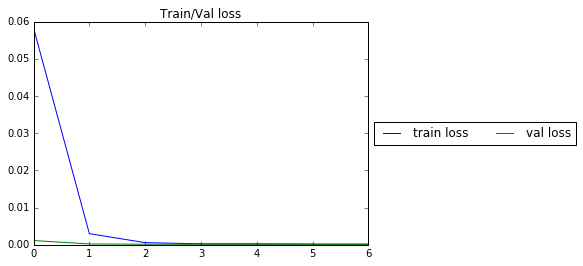

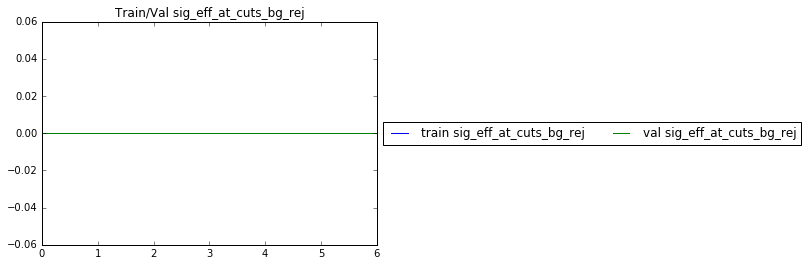

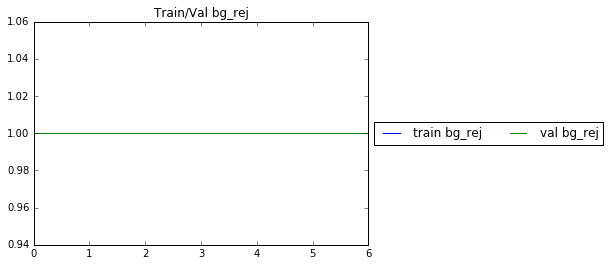

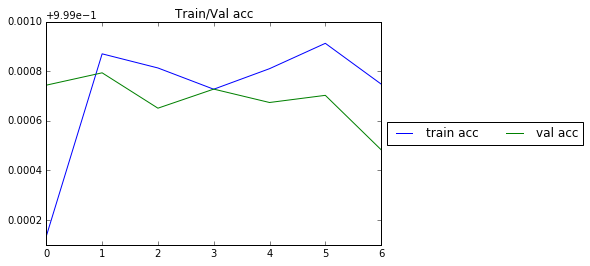

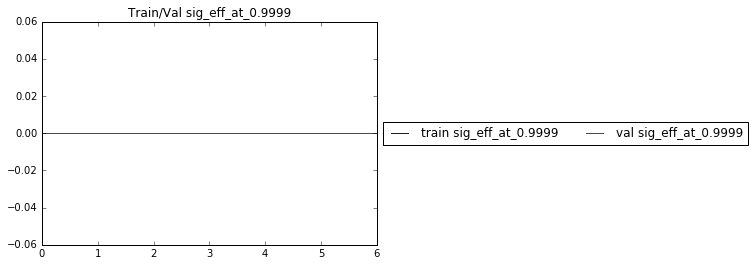

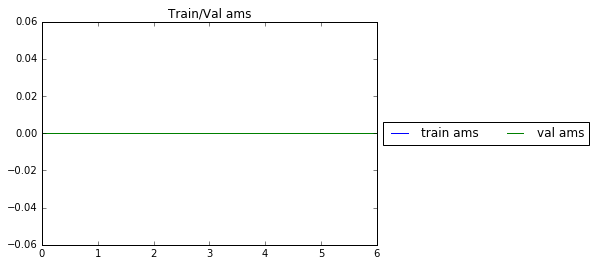

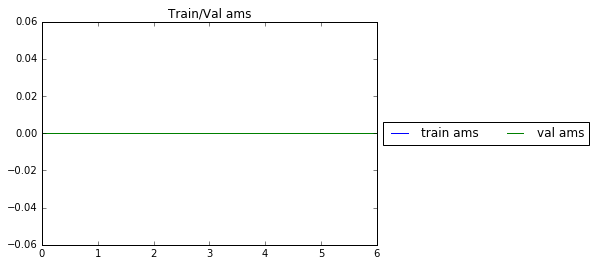

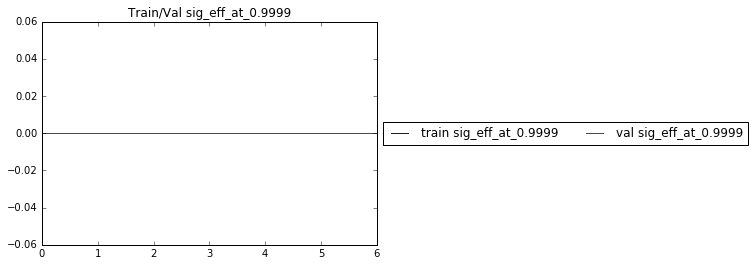

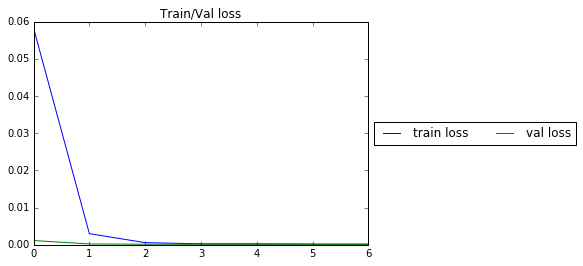

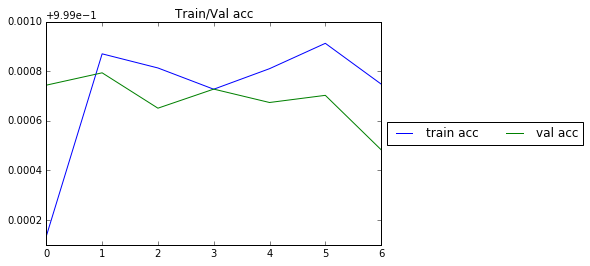

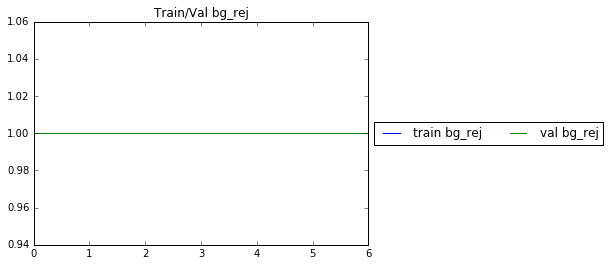

Epoch 7 of 20000 took 8.676s
		tr_sig_eff:		0.0000 %
		tr_phys_cuts_sig_eff:		20.0000 %
		tr_sig_eff_at_cuts_bg_rej:		0.0000 %
		tr_phys_cuts_ams:		7.4727
		tr_phys_cuts_bg_rej:		99.9989 %
		tr_bg_rej:		100.0000 %
		tr_acc:		99.9748 %
		tr_ams:		0.0000
		tr_sig_eff_at_0.9999:		0.0000 %
		tr_loss:		0.0002
	Validation took 0.883s
		val_sig_eff:		0.0000 %
		val_phys_cuts_ams:		0.0000
		val_loss:		0.0001
		val_phys_cuts_bg_rej:		99.9992 %
		val_sig_eff_at_cuts_bg_rej:		0.0000 %
		val_sig_eff_at_0.9999:		0.0000 %
		val_ams:		0.0000
		val_phys_cuts_sig_eff:		0.0000 %
		val_acc:		99.9483 %
		val_bg_rej:		100.0000 %


beginning epoch 7
beginning epoch 7


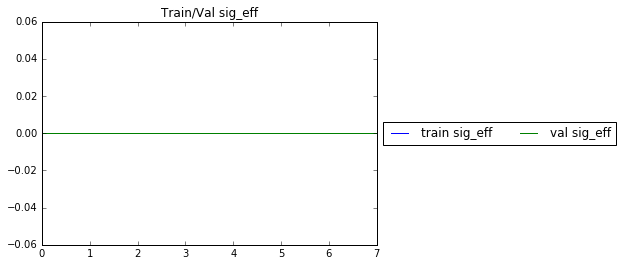

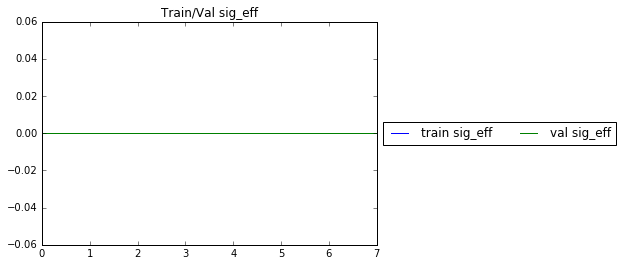

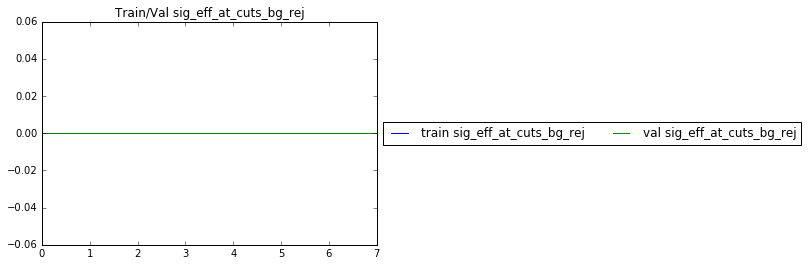

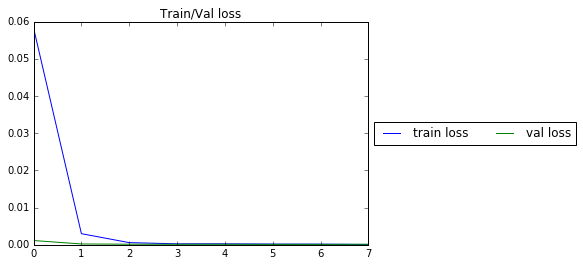

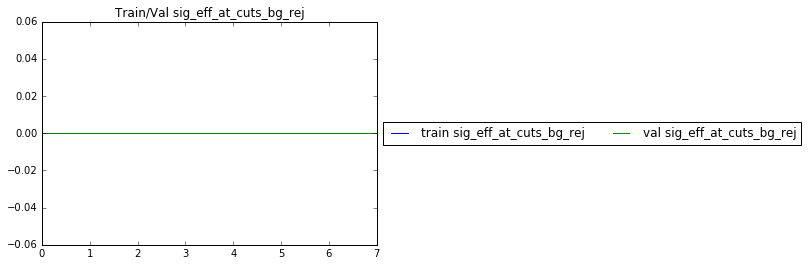

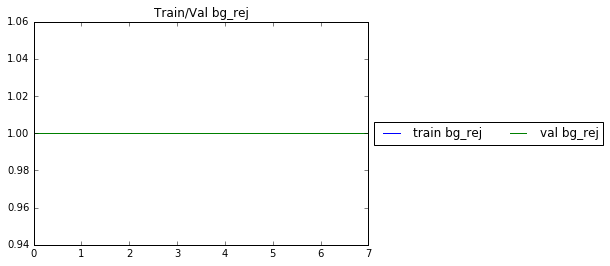

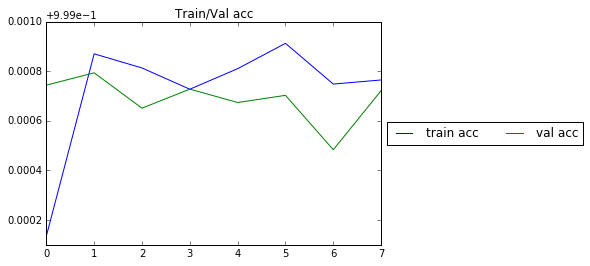

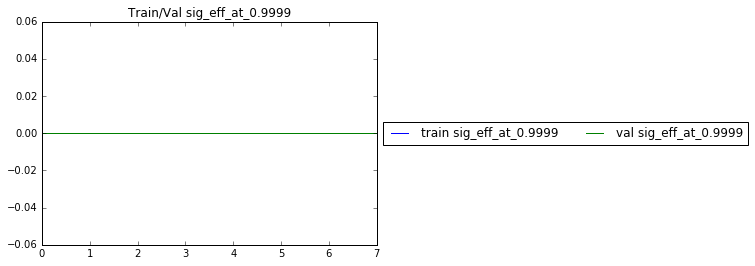

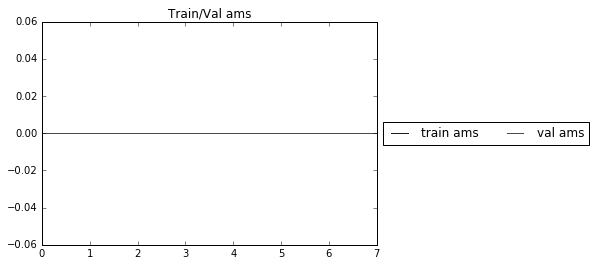

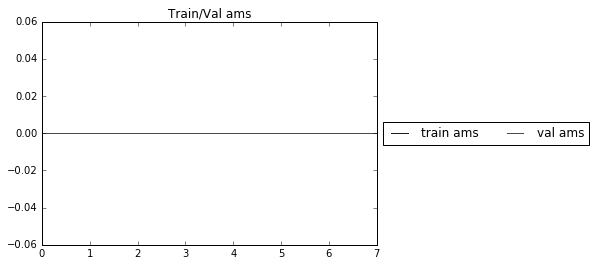

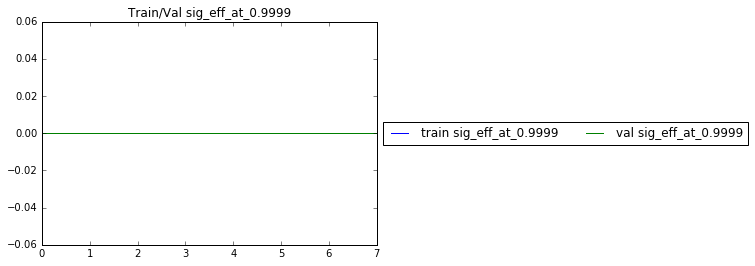

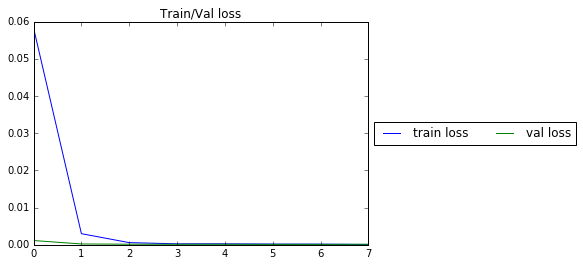

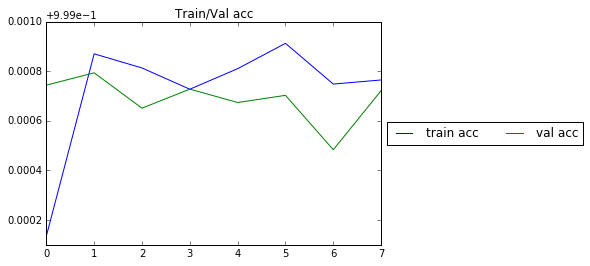

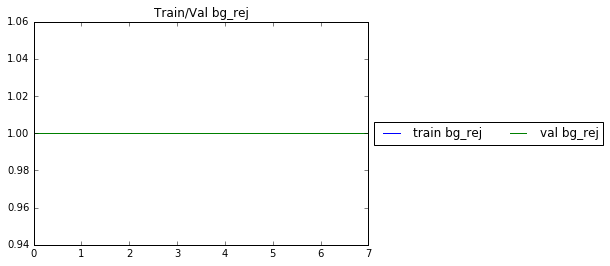

Epoch 8 of 20000 took 7.948s
		tr_sig_eff:		0.0000 %
		tr_phys_cuts_sig_eff:		20.0000 %
		tr_sig_eff_at_cuts_bg_rej:		0.0000 %
		tr_phys_cuts_ams:		7.4727
		tr_phys_cuts_bg_rej:		99.9989 %
		tr_bg_rej:		100.0000 %
		tr_acc:		99.9765 %
		tr_ams:		0.0000
		tr_sig_eff_at_0.9999:		0.0000 %
		tr_loss:		0.0001
	Validation took 0.743s
		val_sig_eff:		0.0000 %
		val_phys_cuts_ams:		0.0000
		val_loss:		0.0001
		val_phys_cuts_bg_rej:		99.9992 %
		val_sig_eff_at_cuts_bg_rej:		0.0000 %
		val_sig_eff_at_0.9999:		0.0000 %
		val_ams:		0.0000
		val_phys_cuts_sig_eff:		0.0000 %
		val_acc:		99.9722 %
		val_bg_rej:		100.0000 %


beginning epoch 8
beginning epoch 8


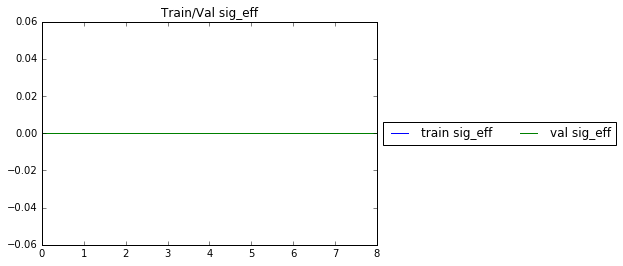

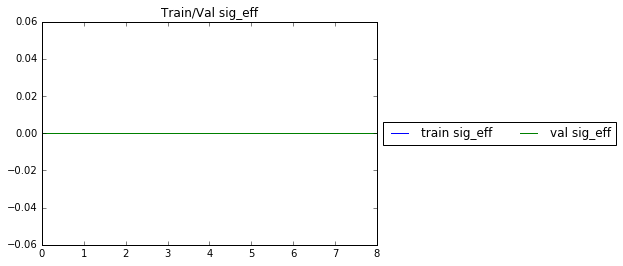

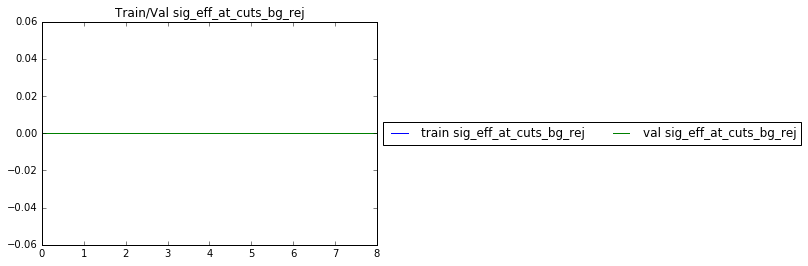

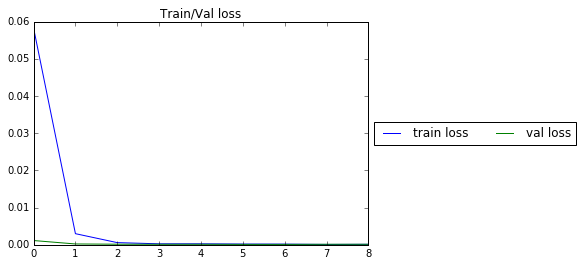

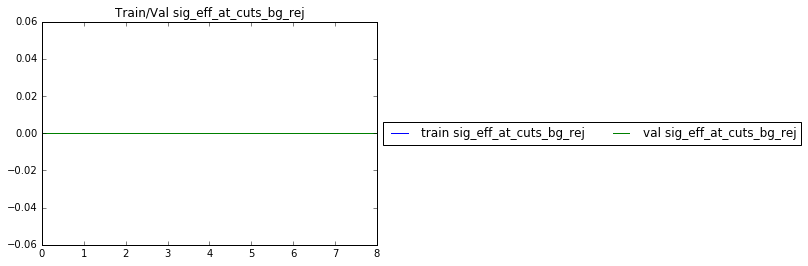

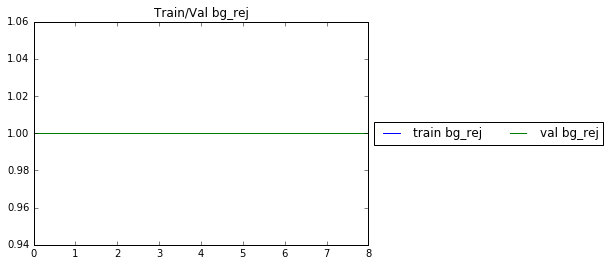

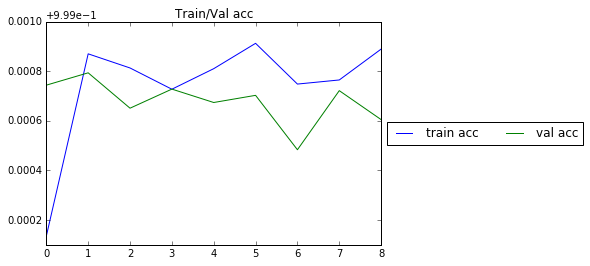

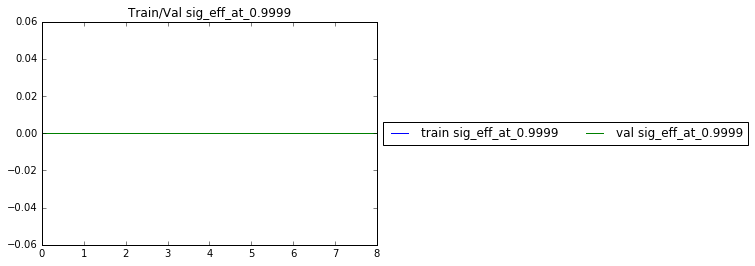

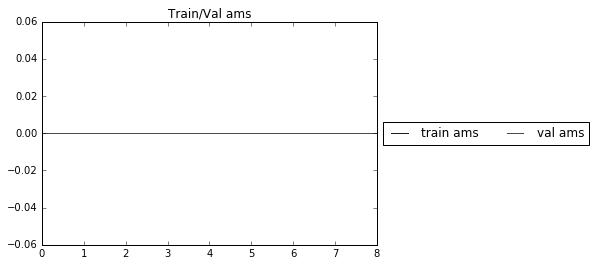

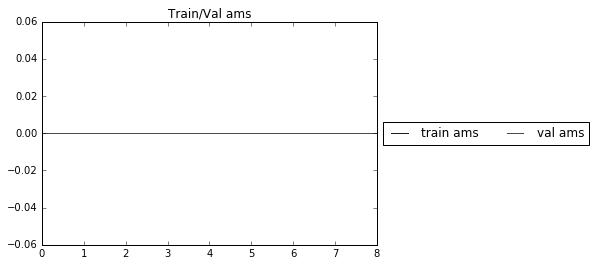

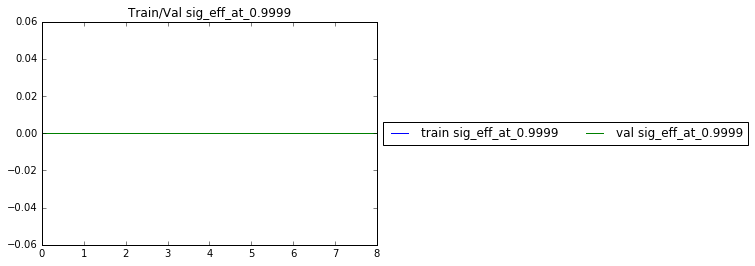

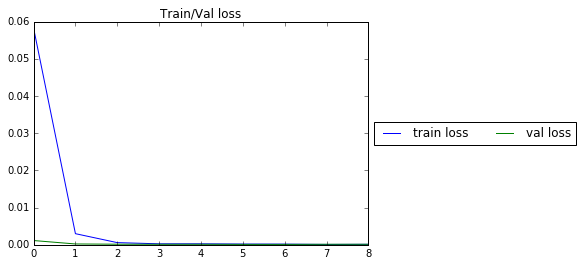

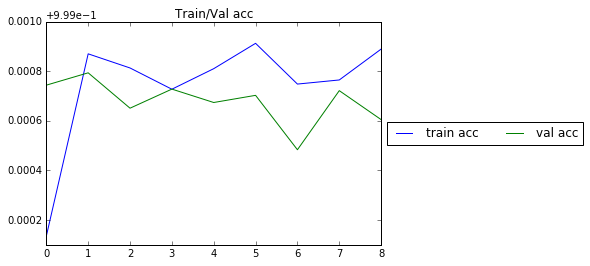

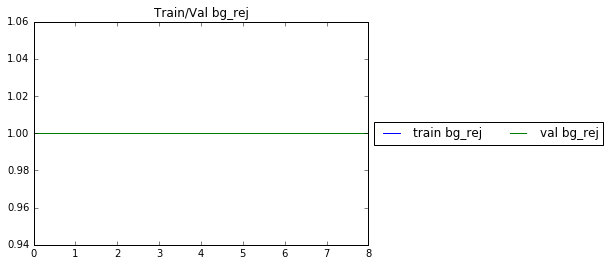

Epoch 9 of 20000 took 9.046s
		tr_sig_eff:		0.0000 %
		tr_phys_cuts_sig_eff:		20.0000 %
		tr_sig_eff_at_cuts_bg_rej:		0.0000 %
		tr_phys_cuts_ams:		7.4727
		tr_phys_cuts_bg_rej:		99.9989 %
		tr_bg_rej:		100.0000 %
		tr_acc:		99.9889 %
		tr_ams:		0.0000
		tr_sig_eff_at_0.9999:		0.0000 %
		tr_loss:		0.0001
	Validation took 0.856s
		val_sig_eff:		0.0000 %
		val_phys_cuts_ams:		0.0000
		val_loss:		0.0001
		val_phys_cuts_bg_rej:		99.9992 %
		val_sig_eff_at_cuts_bg_rej:		0.0000 %
		val_sig_eff_at_0.9999:		0.0000 %
		val_ams:		0.0000
		val_phys_cuts_sig_eff:		0.0000 %
		val_acc:		99.9605 %
		val_bg_rej:		100.0000 %


beginning epoch 9
beginning epoch 9


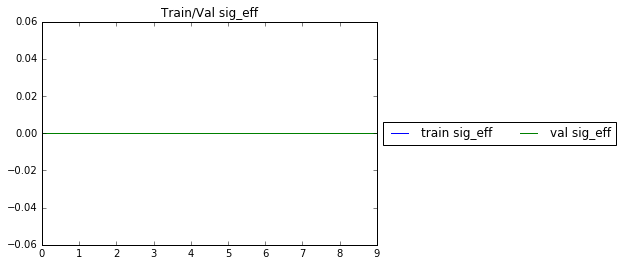

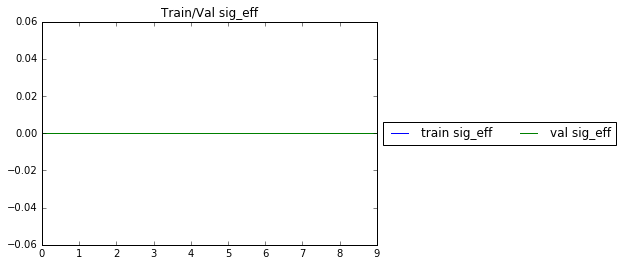

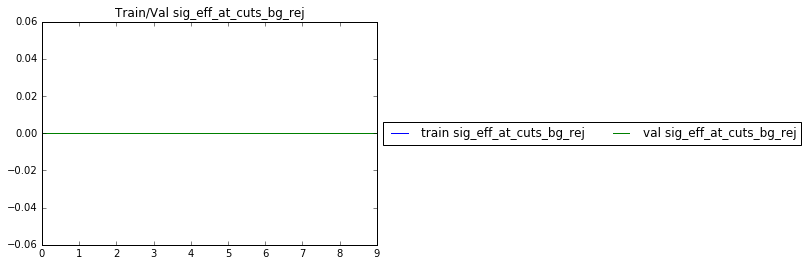

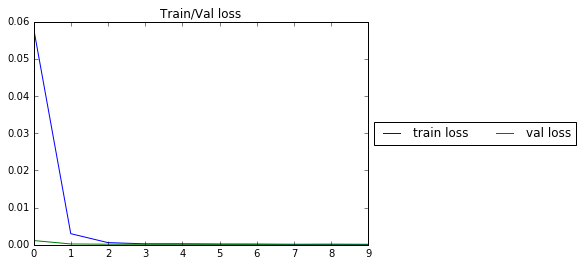

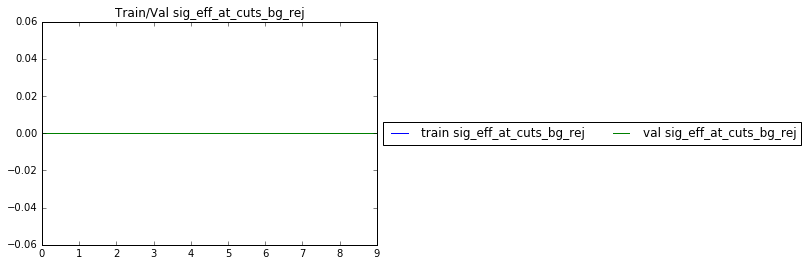

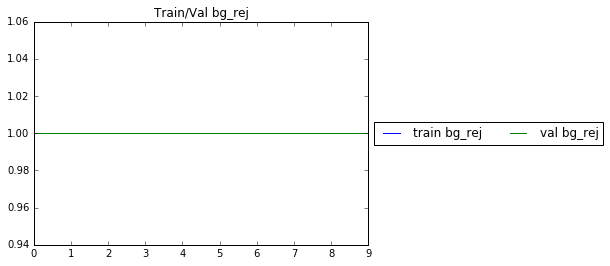

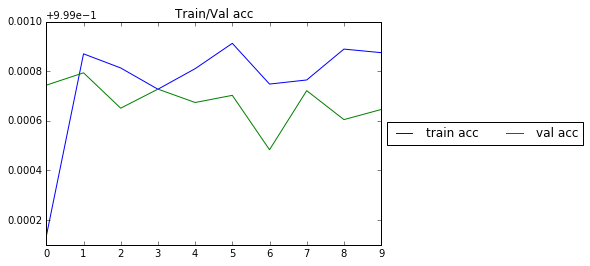

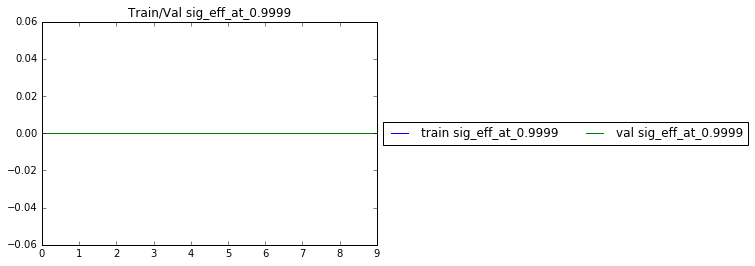

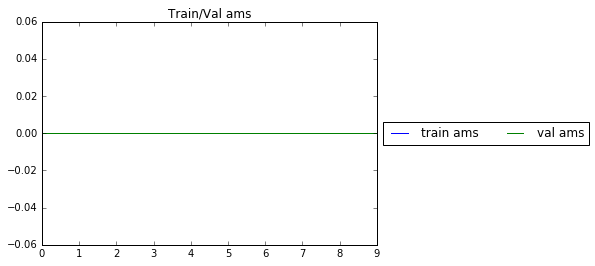

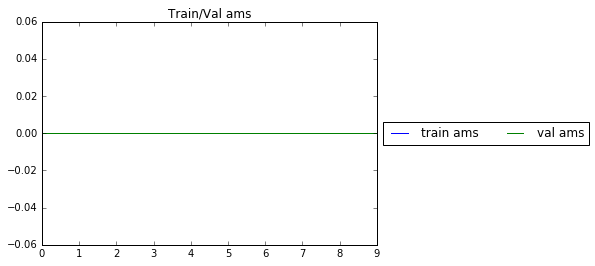

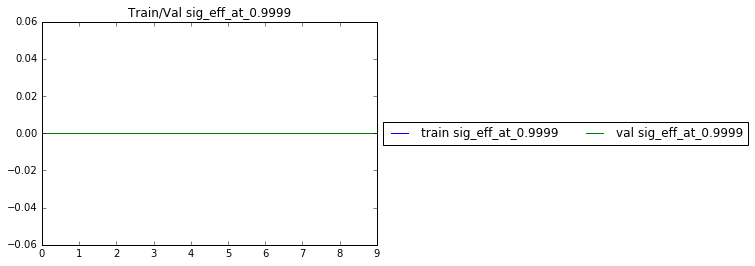

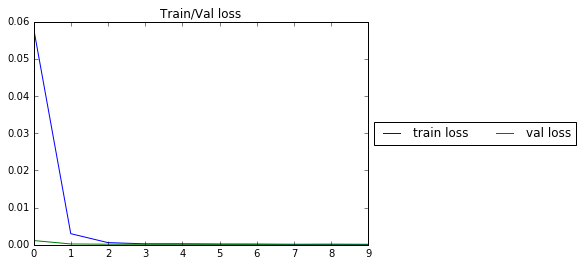

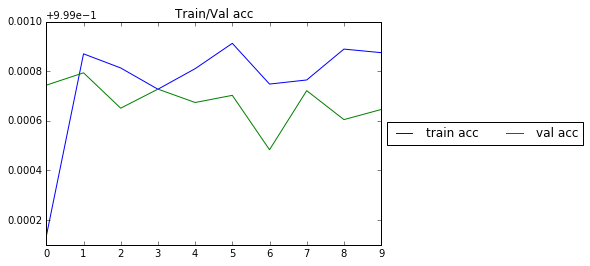

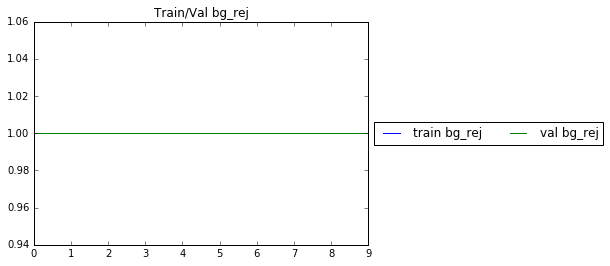

Epoch 10 of 20000 took 9.287s
		tr_sig_eff:		0.0000 %
		tr_phys_cuts_sig_eff:		20.0000 %
		tr_sig_eff_at_cuts_bg_rej:		0.0000 %
		tr_phys_cuts_ams:		7.4727
		tr_phys_cuts_bg_rej:		99.9989 %
		tr_bg_rej:		100.0000 %
		tr_acc:		99.9875 %
		tr_ams:		0.0000
		tr_sig_eff_at_0.9999:		0.0000 %
		tr_loss:		0.0001
	Validation took 0.910s
		val_sig_eff:		0.0000 %
		val_phys_cuts_ams:		0.0000
		val_loss:		0.0001
		val_phys_cuts_bg_rej:		99.9992 %
		val_sig_eff_at_cuts_bg_rej:		0.0000 %
		val_sig_eff_at_0.9999:		0.0000 %
		val_ams:		0.0000
		val_phys_cuts_sig_eff:		0.0000 %
		val_acc:		99.9645 %
		val_bg_rej:		100.0000 %


beginning epoch 10



KeyboardInterrupt



In [3]:
if __name__ == "__main__":
    
    kwargs = setup_kwargs()
    
    h5_prefix = "/global/cscratch1/sd/racah/atlas_h5/"
    
    loader_kwargs = dict(bg_cfg_file=[join(h5_prefix, "train_jetjet_JZ%i.h5"% (i)) for i in range(3,12)],
                    sig_cfg_file=join(h5_prefix, "train_GG_RPV10_1400_850.h5"),
                    events_fraction=kwargs["event_frac"], 
                       test=kwargs["test"])
    
    if kwargs["mode"] == "anomaly":
        dl = AnomalyLoader(**loader_kwargs)
    else:
        dl = DataLoader(**loader_kwargs)
    data = dl.load_data()
    
    kwargs["input_shape"] = tuple([None] + list(data["tr"]["x"].shape[1:]))
    kwargs["num_train"], kwargs["num_val"] = data["tr"]["x"].shape[0], data["val"]["x"].shape[0]
    kwargs["logger"].info(str(kwargs))
    dump_hyperparams(dic=kwargs,path=kwargs["save_path"])
    if kwargs["ae"]:
        net = caen
    else:
        net = bcc
    networks, fns = net.build_network(kwargs, net.build_layers(kwargs))
    
    
    tv = TrainVal(data, kwargs, fns, networks)
    tv.train()

    
    
    

In [ ]:
# h5_prefix = "/project/projectdirs/dasrepo/atlas_rpv_susy/hdf5/prod003_2016_11_14"

# a=h5py.File(join(h5_prefix,"GG_RPV10_1400_850.h5" ))

# w=a["event_10"]["weight"]

# w.value

# g.value

# # x.shape

# # #test
# # x, y, xv,yv = load_train_val(num_events=100000)

# # def test_network(network_path):
# #     x_te, y_te = load_test()

# #     net = pickle.load(open(network_path))

# #     cfg = build_network(network_kwargs,net)
# #     return cfg['val_fn'](x_te, y_te)

# # network_path = './results/run84/model.pkl'



# # net = pickle.load(open(network_path))

# # cfg = build_network(network_kwargs,net)

# # y_pred = cfg['out_fn'](xv)

# # y_pred = y_pred[0]

# # best_sig = xv[np.argmax(y_pred[:,1])]

# # best_bg = xv[np.argmin(y_pred[:,1])]

# # plot_example(np.squeeze(best_sig))

# # plot_example(np.squeeze(best_bg))

# # inds = np.argsort(y_pred[:,1], axis=0)

# # best_bgs = np.squeeze(xv[inds[:25]])

# # best_sigs = np.squeeze(xv[inds[-26:-1]])

# # plot_examples(best_bgs,5, run_dir,"best_bg")

# # plot_examples(best_sigs,5, run_dir, "best_sig")

# # plot_filters(net,save_dir=run_dir)

# # plot_feature_maps(best_bgs[0], net, run_dir, name="best_bg")

# # best_bg = np.expand_dims(np.expand_dims(best_bgs[0], axis=0),axis=0)
# # best_sig = np.expand_dims(np.expand_dims(best_sigs[-1], axis=0),axis=0)
# # saliency_fn = compile_saliency_function(net)
# # saliency, max_class = saliency_fn(best_sig)
# # #np.squeeze(np.abs(saliency)).shape
# # show_images(best_sigs[-1], saliency, max_class, "default gradient", save_dir=run_dir)



